In [2]:
import pandas as pd
df = pd.read_csv('https://query.data.world/s/5vtw64kgwkdod2zwaqwqcci57oosyl?dws=00000')

In [3]:
df.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Location 1,Total Incidents
0,11/12/2016,02:35:00,3B,300 SAINT PAUL PL,ROBBERY - STREET,O,NaN,111.0,CENTRAL,Downtown,"(39.2924100000, -76.6140800000)",1
1,11/12/2016,02:56:00,3CF,800 S BROADWAY,ROBBERY - COMMERCIAL,I,FIREARM,213.0,SOUTHEASTERN,Fells Point,"(39.2824200000, -76.5928800000)",1
2,11/12/2016,03:00:00,6D,1500 PENTWOOD RD,LARCENY FROM AUTO,O,NaN,413.0,NORTHEASTERN,Stonewood-Pentwood-Winston,"(39.3480500000, -76.5883400000)",1
3,11/12/2016,03:00:00,6D,6600 MILTON LN,LARCENY FROM AUTO,O,NaN,424.0,NORTHEASTERN,Westfield,"(39.3626300000, -76.5516100000)",1
4,11/12/2016,03:00:00,6E,300 W BALTIMORE ST,LARCENY,O,NaN,111.0,CENTRAL,Downtown,"(39.2893800000, -76.6197100000)",1


In [4]:
import pandas as pd


# Display the columns and their data types
columns_and_datatypes = df.dtypes
print(columns_and_datatypes)


CrimeDate           object
CrimeTime           object
CrimeCode           object
Location            object
Description         object
Inside/Outside      object
Weapon              object
Post               float64
District            object
Neighborhood        object
Location 1          object
Total Incidents      int64
dtype: object


In [6]:
import mysql.connector

db_connection = mysql.connector.connect(
  host="localhost", 
  user="root",
  password="kidsclub",
  database="bdms"
)

cursor = db_connection.cursor()

create_table_query = """
CREATE TABLE crimedata1 (
  CrimeDate VARCHAR(255),  
  CrimeTime VARCHAR(255),
  CrimeCode VARCHAR(255),
  Location VARCHAR(255),
  Description VARCHAR(255),
  Inside_Outside VARCHAR(255),
  Weapon VARCHAR(255),
  Post VARCHAR(255), 
  District VARCHAR(255),
  Neighborhood VARCHAR(255),
  Location_1 VARCHAR(255),
  Total_Incidents INT
)
""" 

cursor.execute(create_table_query)

# Commit changes
db_connection.commit() 

print("Table created successfully.")

cursor.close()
db_connection.close()

Table created successfully.


In [7]:
import csv
import mysql.connector

db_conn = mysql.connector.connect(user='root', password='kidsclub', 
                                 database='bdms')
cursor = db_conn.cursor()

csv_data = csv.reader(open('data.csv'))
next(csv_data)  

insert_query = """INSERT INTO crimedata1 
                 VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)""" 

for row in csv_data:
    row == [0 if cell is '' else cell for cell in row]    
    # Insert row, NULLs replaced with blank values  
    cursor.execute(insert_query, row) 

db_conn.commit()  

cursor.close() 
db_conn.close()
 
print("CSV Imported")

<>:15: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:15: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\rbsra\AppData\Local\Temp\ipykernel_13904\859812345.py:15: SyntaxWarning: "is" with a literal. Did you mean "=="?
  row == [0 if cell is '' else cell for cell in row]


CSV Imported


In [2]:
from pyspark.sql import SparkSession
from pyspark import SparkConf
from pyspark.sql import SQLContext

# Spark configurations
conf = SparkConf().setAppName('sparkMySQL').setMaster('local[*]')
spark = SparkSession.builder.config(conf=conf).getOrCreate()
sqlContext = SQLContext(spark)

# MySQL configurations
mysql_hostname = "localhost"
mysql_port = 3306
mysql_database = "bdms"
mysql_table = "crimedata1"  
mysql_user = "root"
mysql_password = "kidsclub" 

# Connect to the MySQL database
df = sqlContext.read \
    .format("jdbc") \
    .option("driver", "com.mysql.cj.jdbc.Driver") \
    .option("url", f"jdbc:mysql://{mysql_hostname}:{mysql_port}/{mysql_database}") \
    .option("dbtable", mysql_table) \
    .option("user", mysql_user) \
    .option("password", mysql_password) \
    .load()

df.printSchema()

c:\Users\rbsra\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyspark\sql\context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


root
 |-- CrimeDate: string (nullable = true)
 |-- CrimeTime: string (nullable = true)
 |-- CrimeCode: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Inside_Outside: string (nullable = true)
 |-- Weapon: string (nullable = true)
 |-- Post: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Neighborhood: string (nullable = true)
 |-- Location_1: string (nullable = true)
 |-- Total_Incidents: integer (nullable = true)



In [71]:
df.show()

+----------+---------+---------+--------------------+--------------------+--------------+-------+----+------------+--------------------+--------------------+---------------+
| CrimeDate|CrimeTime|CrimeCode|            Location|         Description|Inside_Outside| Weapon|Post|    District|        Neighborhood|          Location_1|Total_Incidents|
+----------+---------+---------+--------------------+--------------------+--------------+-------+----+------------+--------------------+--------------------+---------------+
|11/12/2016| 02:35:00|       3B|   300 SAINT PAUL PL|    ROBBERY - STREET|             O|       | 111|     CENTRAL|            Downtown|(39.2924100000, -...|              1|
|11/12/2016| 02:56:00|      3CF|      800 S BROADWAY|ROBBERY - COMMERCIAL|             I|FIREARM| 213|SOUTHEASTERN|         Fells Point|(39.2824200000, -...|              1|
|11/12/2016| 03:00:00|       6D|    1500 PENTWOOD RD|   LARCENY FROM AUTO|             O|       | 413|NORTHEASTERN|Stonewood-Pentw

count of crimes per district

In [8]:
import tkinter as tk
from tkinter import ttk


result = df.groupBy('District').count()
result_df = result.collect()

root = tk.Tk()
root.title("Incidents by District")

# Create a Treeview widget to display the result
tree = ttk.Treeview(root, columns=['District', 'Count'], show='headings')
tree.heading('District', text='District')
tree.heading('Count', text='Count')

# Insert data into the Treeview widget
for i, row in enumerate(result_df):
    values = [row['District'], row['count']]
    tree.insert('', i, values=values)

# Pack the Treeview widget
tree.pack()

# Start the Tkinter event loop
root.mainloop()


most common crime code

In [10]:
import tkinter as tk
from tkinter import ttk
result = df.groupBy('CrimeCode').count().orderBy('count', ascending=False)

# Convert the result PySpark DataFrame to a list of Row objects
result_rows = result.collect()

# Create a Tkinter window
root = tk.Tk()
root.title("Incidents by CrimeCode")

# Create a Treeview widget to display the result
tree = ttk.Treeview(root, columns=['CrimeCode', 'Count'], show='headings')
tree.heading('CrimeCode', text='CrimeCode')
tree.heading('Count', text='Count')

# Insert data into the Treeview widget
for i, row in enumerate(result_rows):
    values = [row['CrimeCode'], row['count']]
    tree.insert('', i, values=values)

# Pack the Treeview widget
tree.pack()

# Start the Tkinter event loop
root.mainloop()

Most common crime location

In [69]:
import tkinter as tk
from tkinter import ttk
from pyspark.sql import SparkSession



# Group by 'Location' and count the number of incidents, then order by count in descending order
result = df.groupBy('Location').count().orderBy('count', ascending=False)

# Convert the result PySpark DataFrame to a list of Row objects
result_rows = result.collect()

# Create a Tkinter window
root = tk.Tk()
root.title("Incidents by Location")

# Create a Treeview widget to display the result
tree = ttk.Treeview(root, columns=['Location', 'Count'], show='headings')
tree.heading('Location', text='Location')
tree.heading('Count', text='Count')

# Insert data into the Treeview widget
for i, row in enumerate(result_rows):
    values = [row['Location'], row['count']]
    tree.insert('', i, values=values)

# Pack the Treeview widget
tree.pack()

# Start the Tkinter event loop
root.mainloop()


Description and its count

In [13]:
import tkinter as tk
from tkinter import ttk


# Group by 'Description' and count the number of incidents, then order by count in descending order
result = df.groupBy('Description').count().orderBy('count', ascending=False)

# Convert the result PySpark DataFrame to a list of Row objects
result_rows = result.collect()

# Create a Tkinter window
root = tk.Tk()
root.title("Incidents by Description")

# Create a Treeview widget to display the result
tree = ttk.Treeview(root, columns=['Description', 'Count'], show='headings')
tree.heading('Description', text='Description')
tree.heading('Count', text='Count')

# Insert data into the Treeview widget
for i, row in enumerate(result_rows):
    values = [row['Description'], row['count']]
    tree.insert('', i, values=values)

# Pack the Treeview widget
tree.pack()

# Start the Tkinter event loop
root.mainloop()


In [84]:
from pyspark.sql.functions import to_date, col, year, month

# Assuming 'df' is your DataFrame with the provided schema

# Handle null values and correct the date format
df = df.withColumn(
    "date",
    when(col("CrimeDate").isNull(), None)  # Handle null values
    .otherwise(to_date(col("CrimeDate"), "MM/dd/yyyy").cast("date"))
)

# Extract year and month from the "CrimeDate" column
df = df.withColumn("Year", year("date"))
df = df.withColumn("Month", month("date"))

# Display the updated DataFrame
df.show()


+----------+---------+---------+--------------------+--------------------+--------------+-------+----+------------+--------------------+--------------------+---------------+--------------+----------------+----------+--------+-------------------+--------------------+--------------------+--------------------+----+-----+----+
| CrimeDate|CrimeTime|CrimeCode|            Location|         Description|Inside_Outside| Weapon|Post|    District|        Neighborhood|          Location_1|Total_Incidents|      Latitude|       Longitude|      date|    Time|   Location_grouped|   Description_words|         rawFeatures|Description_features|Year|Month|Hour|
+----------+---------+---------+--------------------+--------------------+--------------+-------+----+------------+--------------------+--------------------+---------------+--------------+----------------+----------+--------+-------------------+--------------------+--------------------+--------------------+----+-----+----+
|11/12/2016| 02:35:00|   

In [85]:
df.select('CrimeDate','year','date').show()

+----------+----+----------+
| CrimeDate|year|      date|
+----------+----+----------+
|11/12/2016|2016|2016-11-12|
|11/12/2016|2016|2016-11-12|
|11/12/2016|2016|2016-11-12|
|11/12/2016|2016|2016-11-12|
|11/12/2016|2016|2016-11-12|
|11/12/2016|2016|2016-11-12|
|11/12/2016|2016|2016-11-12|
|11/12/2016|2016|2016-11-12|
|11/12/2016|2016|2016-11-12|
|11/12/2016|2016|2016-11-12|
|11/12/2016|2016|2016-11-12|
|11/12/2016|2016|2016-11-12|
|11/12/2016|2016|2016-11-12|
|11/12/2016|2016|2016-11-12|
|11/12/2016|2016|2016-11-12|
|11/12/2016|2016|2016-11-12|
|11/12/2016|2016|2016-11-12|
|11/12/2016|2016|2016-11-12|
|11/12/2016|2016|2016-11-12|
|11/12/2016|2016|2016-11-12|
+----------+----+----------+
only showing top 20 rows



In [77]:
df.printSchema()

root
 |-- CrimeDate: string (nullable = true)
 |-- CrimeTime: string (nullable = true)
 |-- CrimeCode: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Inside_Outside: string (nullable = true)
 |-- Weapon: string (nullable = true)
 |-- Post: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Neighborhood: string (nullable = true)
 |-- Location_1: string (nullable = true)
 |-- Total_Incidents: integer (nullable = true)
 |-- date: date (nullable = true)



In [18]:
from pyspark.sql.functions import date_format

# Convert timestamp to string and extract time
df = df.withColumn('Time', date_format(df['CrimeTime'], 'HH:mm:ss'))


In [19]:
df.show()

+----------+---------+---------+--------------------+--------------------+--------------+-------+----+------------+--------------------+--------------------+---------------+--------------+----------------+----------+--------+
| CrimeDate|CrimeTime|CrimeCode|            Location|         Description|Inside_Outside| Weapon|Post|    District|        Neighborhood|          Location_1|Total_Incidents|      Latitude|       Longitude|      date|    Time|
+----------+---------+---------+--------------------+--------------------+--------------+-------+----+------------+--------------------+--------------------+---------------+--------------+----------------+----------+--------+
|11/12/2016| 02:35:00|       3B|   300 SAINT PAUL PL|    ROBBERY - STREET|             O|       | 111|     CENTRAL|            Downtown|(39.2924100000, -...|              1|(39.2924100000| -76.6140800000)|2015-12-27|02:35:00|
|11/12/2016| 02:56:00|      3CF|      800 S BROADWAY|ROBBERY - COMMERCIAL|             I|FIREARM

In [20]:
df.drop('Time').show()

+----------+---------+---------+--------------------+--------------------+--------------+-------+----+------------+--------------------+--------------------+---------------+--------------+----------------+----------+
| CrimeDate|CrimeTime|CrimeCode|            Location|         Description|Inside_Outside| Weapon|Post|    District|        Neighborhood|          Location_1|Total_Incidents|      Latitude|       Longitude|      date|
+----------+---------+---------+--------------------+--------------------+--------------+-------+----+------------+--------------------+--------------------+---------------+--------------+----------------+----------+
|11/12/2016| 02:35:00|       3B|   300 SAINT PAUL PL|    ROBBERY - STREET|             O|       | 111|     CENTRAL|            Downtown|(39.2924100000, -...|              1|(39.2924100000| -76.6140800000)|2015-12-27|
|11/12/2016| 02:56:00|      3CF|      800 S BROADWAY|ROBBERY - COMMERCIAL|             I|FIREARM| 213|SOUTHEASTERN|         Fells Po

In [21]:
from pyspark.sql.functions import hour, minute, second
df.withColumn("hour", hour(col("CrimeTime")))    .withColumn("minute", minute(col("CrimeTime")))    .withColumn("second", second(col("CrimeTime")))    .show()

+----------+---------+---------+--------------------+--------------------+--------------+-------+----+------------+--------------------+--------------------+---------------+--------------+----------------+----------+--------+----+------+------+
| CrimeDate|CrimeTime|CrimeCode|            Location|         Description|Inside_Outside| Weapon|Post|    District|        Neighborhood|          Location_1|Total_Incidents|      Latitude|       Longitude|      date|    Time|hour|minute|second|
+----------+---------+---------+--------------------+--------------------+--------------+-------+----+------------+--------------------+--------------------+---------------+--------------+----------------+----------+--------+----+------+------+
|11/12/2016| 02:35:00|       3B|   300 SAINT PAUL PL|    ROBBERY - STREET|             O|       | 111|     CENTRAL|            Downtown|(39.2924100000, -...|              1|(39.2924100000| -76.6140800000)|2015-12-27|02:35:00|   2|    35|     0|
|11/12/2016| 02:56:0

date with the highest crime

In [16]:
import tkinter as tk
from tkinter import ttk
from pyspark.sql.functions import to_date
from pyspark.sql import SparkSession
from pyspark.sql.types import StringType
import pandas as pd

# Create a Spark session (you might already have this in your code)
# Assuming df is your DataFrame
# ... (you already have the DataFrame)

# Convert date to a string for grouping by date
df = df.withColumn('date_str', to_date(df['date']).cast(StringType()))

# Group by date and count the number of crimes
result = df.groupBy('date_str').count()

# Order by count in descending order and show the date with the most crimes
result = result.orderBy('count', ascending=False)
most_crimes_date_row = result.first()
most_crimes_date = most_crimes_date_row['date_str'] if most_crimes_date_row else None

# Collect the result to the driver as a list
result_list = result.collect()

# Create a Tkinter window
root = tk.Tk()
root.title("Crime Statistics")

# Create a Text widget to display the result
text_result = tk.Text(root, height=10, width=50)
for row in result_list:
    text_result.insert(tk.END, f"{row['date_str']}\t{row['count']}\n")
text_result.pack()

# Create a Label widget to display the date with the most crimes
label_most_crimes = tk.Label(root, text=f"Date with the Most Crimes: {most_crimes_date}", font=("Helvetica", 12), fg="green")
label_most_crimes.pack()

# Start the Tkinter event loop
root.mainloop()


Grouping by latitude, longitude, and crime type to get counts
Ordering the results by count to identify hotspots

In [3]:
from PyQt5.QtWidgets import QApplication, QMainWindow, QTableWidget, QTableWidgetItem, QVBoxLayout, QWidget

from pyspark.sql.functions import split


df = df.withColumn('Latitude', split(df['Location_1'], ',').getItem(0))
df = df.withColumn('Longitude', split(df['Location_1'], ',').getItem(1))

# Group by Latitude, Longitude, and CrimeCode and count the number of crimes
result = df.groupBy('Latitude', 'Longitude', 'CrimeCode').count()

# Order by count in descending order to identify hotspots
result = result.orderBy('count', ascending=False)

result_rows = result.collect()

# Create a PyQt5 application
app = QApplication([])
window = QMainWindow()
window.setWindowTitle("Crime Hotspots")

# Create a QTableWidget to display the result
table = QTableWidget()
table.setColumnCount(4)
table.setHorizontalHeaderLabels(['Latitude', 'Longitude', 'CrimeCode', 'Count'])

# Insert data into the QTableWidget
for i, row in enumerate(result_rows):
    table.insertRow(i)
    for j, value in enumerate([row['Latitude'], row['Longitude'], row['CrimeCode'], row['count']]):
        item = QTableWidgetItem(str(value))
        table.setItem(i, j, item)

# Create a QWidget to hold the QTableWidget
central_widget = QWidget()
central_layout = QVBoxLayout(central_widget)
central_layout.addWidget(table)

# Set the central widget for the QMainWindow
window.setCentralWidget(central_widget)

# Show the QMainWindow
window.show()

# Start the PyQt5 event loop
app.exec_()


0

In [4]:
from pyspark.sql.functions import month, year
import tkinter as tk
from tkinter import ttk

# Extract month and year from CrimeDate
df = df.withColumn('Year', year(df['date']))
df = df.withColumn('Month', month(df['date']))

# Group by Month, Year, and CrimeCode and count the number of crimes
result = df.groupBy('Month', 'Year', 'CrimeCode').count()

# Order by Month, Year, and count
result = result.orderBy('Month', 'Year', 'count', ascending=False)


result_list = result.collect()

# Convert the list of Row objects to a Pandas DataFrame
result_pandas = pd.DataFrame(result_list, columns=result.columns)

root = tk.Tk()
tree = ttk.Treeview(root, columns=list(result_pandas.columns), show='headings')
for col in result_pandas.columns:
    tree.heading(col, text=col)
    tree.column(col, width=100)  # Adjust the column width as needed

# Insert data into the Treeview widget
for i in range(len(result_pandas)):
    tree.insert('', i, values=list(result_pandas.iloc[i]))

# Pack the Treeview widget
tree.pack()

# Start the Tkinter event loop
root.mainloop()


AnalysisException: [UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `date` cannot be resolved. Did you mean one of the following? [`CrimeDate`, `CrimeTime`, `CrimeCode`, `Location`, `Description`, `Inside_Outside`, `Weapon`, `Post`, `District`, `Neighborhood`, `Location_1`, `Total_Incidents`, `Latitude`, `Longitude`].

WEAPON TYPE AND ITS COUNT

In [5]:
import tkinter as tk
from pyspark.sql import SparkSession

guns = df.filter(df["weapon"] == "FIREARM").count()
knives = df.filter(df["weapon"] == "KNIFE").count()
hands = df.filter(df["weapon"] == "HANDS").count()

# Create a Tkinter window
root = tk.Tk()
root.title("Weapon-related Crimes")

# Create labels to display counts
label_guns = tk.Label(root, text=f"Firearm-related Crimes: {guns}")
label_knives = tk.Label(root, text=f"Knife-related Crimes: {knives}")
label_hands = tk.Label(root, text=f"Hands-related Crimes: {hands}")

# Pack the labels
label_guns.pack()
label_knives.pack()
label_hands.pack()

# Start the Tkinter event loop
root.mainloop()


In [6]:
df.printSchema()

root
 |-- CrimeDate: string (nullable = true)
 |-- CrimeTime: string (nullable = true)
 |-- CrimeCode: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Inside_Outside: string (nullable = true)
 |-- Weapon: string (nullable = true)
 |-- Post: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Neighborhood: string (nullable = true)
 |-- Location_1: string (nullable = true)
 |-- Total_Incidents: integer (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)



In [101]:
df.filter(df["weapon"]=="HANDS").select(col("Description")).distinct().show()

df.filter(df["weapon"]=="FIREARM").select(col("Description")).distinct().show()

+--------------+
|   Description|
+--------------+
|  AGG. ASSAULT|
|COMMON ASSAULT|
+--------------+

+--------------------+
|         Description|
+--------------------+
|ROBBERY - COMMERCIAL|
|        AGG. ASSAULT|
| ROBBERY - RESIDENCE|
|            SHOOTING|
|    ROBBERY - STREET|
|            HOMICIDE|
|ROBBERY - CARJACKING|
+--------------------+



ranking of weapon involvement and its crimecode

In [9]:
from pyspark.sql import functions as F
from pyspark.sql.window import Window



# Group by 'Crime Code' and 'Weapon', and count occurrences
df_grouped = df.groupBy("CrimeCode", "Weapon").count()

# Define a window partitioned by 'Crime Code', ordered by count in descending order
window = Window.partitionBy("CrimeCode").orderBy(F.desc("count"))

# Add a column for ranking the weapon involvement within each crime code
df_ranked = df_grouped.withColumn("rank", F.rank().over(window))

# Show the DataFrame
df_ranked.show()

+---------+-------+-----+----+
|CrimeCode| Weapon|count|rank|
+---------+-------+-----+----+
|       1F|FIREARM| 1206|   1|
|       1K|  KNIFE|  159|   1|
|       1O|  OTHER|  105|   1|
|       2A|  OTHER| 1472|   1|
|       2B|       |  237|   1|
|      3AF|FIREARM| 7266|   1|
|     3AJF|FIREARM|  880|   1|
|     3AJK|  KNIFE|   78|   1|
|     3AJO|  OTHER|   61|   1|
|      3AK|  KNIFE| 1651|   1|
|      3AO|  OTHER| 1104|   1|
|       3B|       | 6045|   1|
|      3BJ|       |  260|   1|
|      3CF|FIREARM| 2055|   1|
|      3CK|  KNIFE|  295|   1|
|      3CO|  OTHER|  219|   1|
|       3D|       |  691|   1|
|      3EF|FIREARM|   74|   1|
|      3EK|  KNIFE|   18|   1|
|      3EO|  OTHER|    8|   1|
+---------+-------+-----+----+
only showing top 20 rows



In [11]:
import tkinter as tk
from tkinter import ttk
import pandas as pd
# Group by 'Neighborhood' and count total incidents
df_grouped = df.groupBy("Neighborhood").count()

# Order neighborhoods by the total number of incidents in descending order
df_ordered = df_grouped.orderBy(F.desc("count"))

root = tk.Tk()
root.title("Neighborhoods with the most crime")
df_pandas = df_ordered.collect()
df_pandas = pd.DataFrame(df_pandas, columns=df_ordered.columns)

tree = ttk.Treeview(root, columns=list(df_pandas.columns), show='headings')
for col in df_pandas.columns:
    tree.heading(col, text=col)
    tree.column(col, width=100)  # Adjust the column width as needed

# Insert data into the Treeview widget
for i in range(len(df_pandas)):
    tree.insert('', i, values=list(df_pandas.iloc[i]))

# Pack the Treeview widget
tree.pack()

# Start the Tkinter event loop
root.mainloop()

number of crimes per date

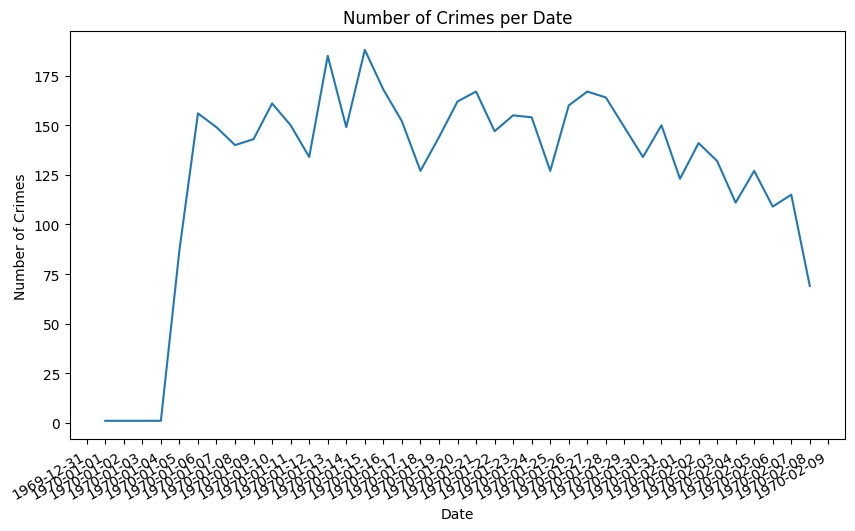

In [13]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

df_100 = df.limit(5000)

# Count the number of crimes for each distinct date
crime_counts = df_100.groupBy("CrimeDate").count().orderBy('CrimeDate')

# Convert to Pandas DataFrame for plotting
array = crime_counts.collect()
pdf = pd.DataFrame(array, columns=['CrimeDate', 'count'])

root = tk.Tk()
root.title("Number of crimes per date")

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.plot(pdf['CrimeDate'], pdf['count'])
fig.autofmt_xdate()  # Rotation
ax.set_xlabel('Date')
ax.set_ylabel('Number of Crimes')
ax.set_title('Number of Crimes per Date')

# Embed Matplotlib plot in Tkinter window
canvas = FigureCanvasTkAgg(fig, master=root)
canvas_widget = canvas.get_tk_widget()
canvas_widget.pack()

# Start the Tkinter event loop
root.mainloop()


In [15]:
df.printSchema()

root
 |-- CrimeDate: string (nullable = true)
 |-- CrimeTime: string (nullable = true)
 |-- CrimeCode: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Inside_Outside: string (nullable = true)
 |-- Weapon: string (nullable = true)
 |-- Post: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Neighborhood: string (nullable = true)
 |-- Location_1: string (nullable = true)
 |-- Total_Incidents: integer (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)



Locator attempting to generate 2010 ticks ([14878.0, ..., 16887.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2010 ticks ([14878.0, ..., 16887.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2010 ticks ([14878.0, ..., 16887.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2010 ticks ([14878.0, ..., 16887.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2010 ticks ([14878.0, ..., 16887.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2010 ticks ([14878.0, ..., 16887.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2010 ticks ([14878.0, ..., 16887.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2010 ticks ([14878.0, ..., 16887.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2010 ticks ([14878.0, ..., 16887.0]), which exceeds Locator.MAXTICKS (1000).


KeyboardInterrupt: 

Locator attempting to generate 2010 ticks ([14878.0, ..., 16887.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2010 ticks ([14878.0, ..., 16887.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2010 ticks ([14878.0, ..., 16887.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2010 ticks ([14878.0, ..., 16887.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2010 ticks ([14878.0, ..., 16887.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2010 ticks ([14878.0, ..., 16887.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2010 ticks ([14878.0, ..., 16887.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2010 ticks ([14878.0, ..., 16887.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2010 ticks ([14878.0, ..., 16887.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to genera

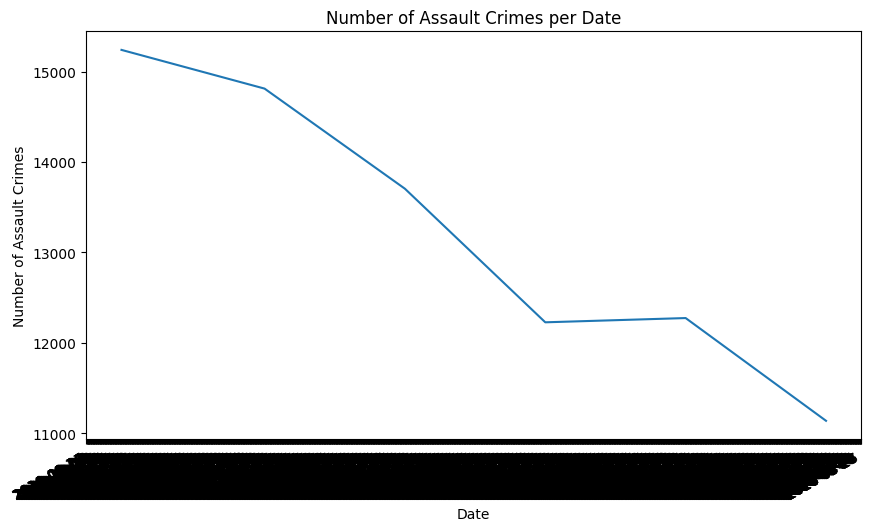

In [22]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

df_assault = df.filter(df.Description.contains('assault'))

# Count the number of crimes for each distinct date
crime_counts = df_assault.groupBy("date").count().orderBy('date')

# Convert to Pandas DataFrame for plotting
crime = crime_counts.collect()
pdf = pd.DataFrame(crime, columns=['date', 'count'])

# Create a Tkinter window
root = tk.Tk()
root.title("Number of Assault Crimes per Date")

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.plot(pdf['date'], pdf['count'])
fig.autofmt_xdate()  # Rotation
ax.set_xlabel('Date')
ax.set_ylabel('Number of Assault Crimes')
ax.set_title('Number of Assault Crimes per Date')

# Embed Matplotlib plot in Tkinter window
canvas = FigureCanvasTkAgg(fig, master=root)
canvas_widget = canvas.get_tk_widget()
canvas_widget.pack()

# Start the Tkinter event loop
root.mainloop()


C:\Users\rbsra\AppData\Local\Temp\ipykernel_5740\3032735783.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(pdf['District'], rotation=45)


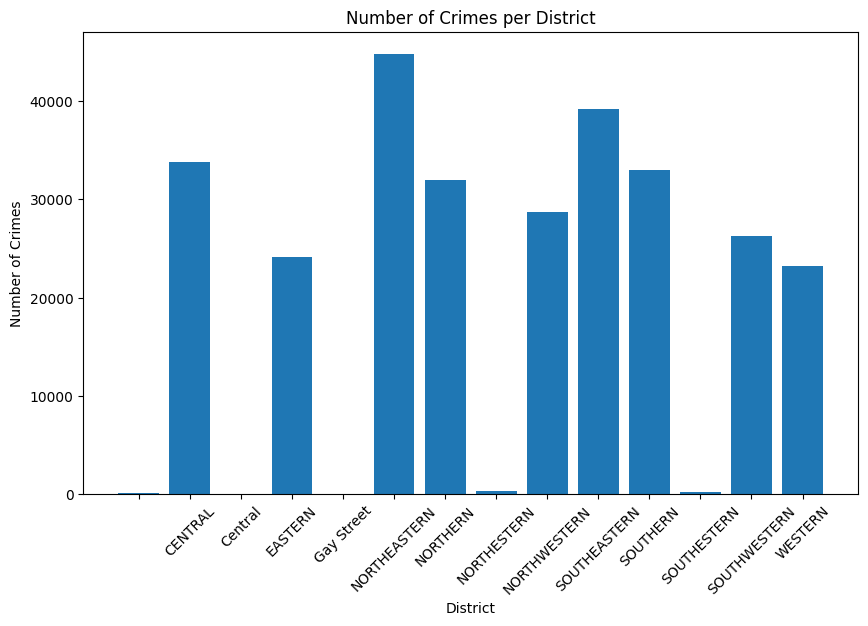

In [23]:
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

crime_counts = df.groupBy("District").count().orderBy('District')

# Convert to Pandas DataFrame for plotting
pdf = crime_counts.collect()
pdf = pd.DataFrame(pdf, columns=['District', 'count'])

# Create a Tkinter window
root = tk.Tk()
root.title("Number of Crimes per District")

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(pdf['District'], pdf['count'])
ax.set_xticklabels(pdf['District'], rotation=45)
ax.set_xlabel('District')
ax.set_ylabel('Number of Crimes')
ax.set_title('Number of Crimes per District')

# Embed Matplotlib plot in Tkinter window
canvas = FigureCanvasTkAgg(fig, master=root)
canvas_widget = canvas.get_tk_widget()
canvas_widget.pack()

# Start the Tkinter event loop
root.mainloop()


C:\Users\rbsra\AppData\Local\Temp\ipykernel_5740\55368018.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(pdf['District'], rotation=45)


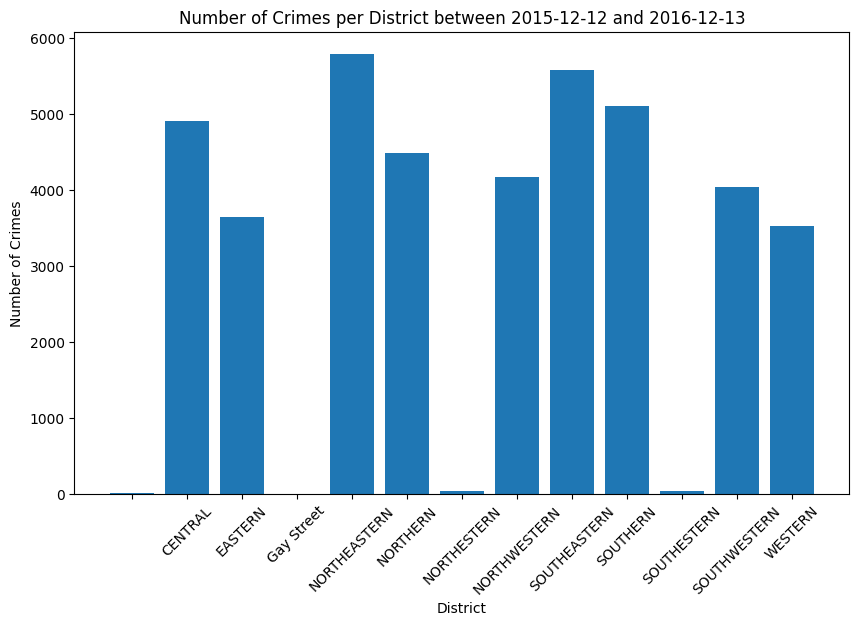

In [24]:
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Filter rows where 'date' is between December 12th, 2015, and December 13th, 2016
df_new = df.filter((df["date"] >= '2015-12-12') & (df["date"] < '2016-12-13'))

# Count the number of crimes for each distinct district
crime_counts = df_new.groupBy("District").count().orderBy('District')

# Convert to Pandas DataFrame for plotting
pdf = crime_counts.collect()
pdf = pd.DataFrame(pdf, columns=['District', 'count'])

# Create a Tkinter window
root = tk.Tk()
root.title("Number of Crimes per District between 2015-12-12 and 2016-12-13")

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(pdf['District'], pdf['count'])
ax.set_xticklabels(pdf['District'], rotation=45)
ax.set_xlabel('District')
ax.set_ylabel('Number of Crimes')
ax.set_title('Number of Crimes per District between 2015-12-12 and 2016-12-13')

# Embed Matplotlib plot in Tkinter window
canvas = FigureCanvasTkAgg(fig, master=root)
canvas_widget = canvas.get_tk_widget()
canvas_widget.pack()

# Start the Tkinter event loop
root.mainloop()


In [132]:
# Assuming df is your DataFrame

# Find distinct values in 'District'
print("Distinct values in District:")
df.select("District").distinct().show()

# Find distinct values in 'Inside_Outside'
print("Distinct values in Inside_Outside:")
df.select("Inside_Outside").distinct().show()

# Find distinct values in 'Location'
print("Distinct values in Location:")
df.select("Location").distinct().show()


Distinct values in District:
+------------+
|    District|
+------------+
| NORTHESTERN|
|  Gay Street|
|     EASTERN|
|SOUTHWESTERN|
|     CENTRAL|
|NORTHWESTERN|
|NORTHEASTERN|
|    SOUTHERN|
|     Central|
| SOUTHESTERN|
|SOUTHEASTERN|
|            |
|    NORTHERN|
|     WESTERN|
+------------+

Distinct values in Inside_Outside:
+--------------+
|Inside_Outside|
+--------------+
|        Inside|
|             O|
|       Outside|
|             I|
|              |
+--------------+

Distinct values in Location:
+--------------------+
|            Location|
+--------------------+
|     1300 HOLLINS ST|
|      400 LAURENS ST|
|1100 W NORTHERN PKWY|
|LANVALE ST & N PA...|
|    1300 DIVISION ST|
|     1200 CARROLL ST|
|    1700 N MONROE ST|
|   100 CEDARCROFT RD|
|     3100 BARCLAY ST|
|  1600 CLIFTVIEW AVE|
|1900 N WASHINGTON ST|
|   3700 FERNHILL AVE|
|      1700 BOLTON ST|
|      1900 ETTING ST|
|  6400 FIELDCREST RD|
|     1200 W CROSS ST|
| 1600 E BALTIMORE ST|
|    0 N MONTFORD AVE|

In [31]:
df.printSchema()

root
 |-- CrimeDate: string (nullable = true)
 |-- CrimeTime: string (nullable = true)
 |-- CrimeCode: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Inside_Outside: string (nullable = true)
 |-- Weapon: string (nullable = true)
 |-- Post: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Neighborhood: string (nullable = true)
 |-- Location_1: string (nullable = true)
 |-- Total_Incidents: integer (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- date: date (nullable = true)
 |-- Time: string (nullable = true)
 |-- Location_grouped: string (nullable = true)



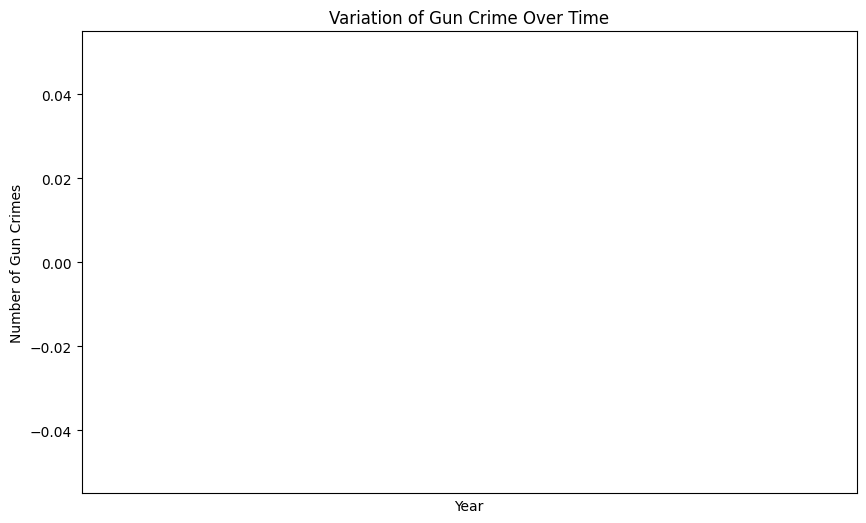

In [55]:
from pyspark.sql.functions import year
import matplotlib.pyplot as plt

# Extract year from date and cast it to integer
df = df.withColumn("Year", year(df["date"]).cast("integer"))

# Filter rows where Weapon is 'Gun'
df_gun_crimes = df.filter(df["Weapon"] == "Gun")

# Aggregate data by year
df_yearly_counts = df_gun_crimes.groupBy("Year").count().orderBy("Year")

# Collect data to the driver node
yearly_counts = df_yearly_counts.collect()

# Separate years and counts into two lists
years = [row["Year"] for row in yearly_counts]
counts = [row["count"] for row in yearly_counts]

# Plot data
plt.figure(figsize=(10, 6))
plt.plot(years, counts)
plt.xticks(years)  # Ensure all years are displayed on x-axis
plt.xlabel("Year")
plt.ylabel("Number of Gun Crimes")
plt.title("Variation of Gun Crime Over Time")
plt.show()


In [56]:
df.printSchema()


root
 |-- CrimeDate: string (nullable = true)
 |-- CrimeTime: string (nullable = true)
 |-- CrimeCode: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Inside_Outside: string (nullable = true)
 |-- Weapon: string (nullable = true)
 |-- Post: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Neighborhood: string (nullable = true)
 |-- Location_1: string (nullable = true)
 |-- Total_Incidents: integer (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- date: date (nullable = true)
 |-- Time: string (nullable = true)
 |-- Location_grouped: string (nullable = true)
 |-- Description_words: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- rawFeatures: vector (nullable = true)
 |-- Description_features: vector (nullable = true)
 |-- Year: integer (nullable = true)



In [61]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, when

# Create a Spark session
spark = SparkSession.builder.appName("WeaponVariationOverYears").getOrCreate()

# Assuming 'df' is your DataFrame with the provided schema

# Filter rows where 'Weapon' is 'GUN'
df_gun = df.filter(df.Weapon == 'HANDS')

# Group by 'Year' and count the occurrences of 'GUN' weapon
gun_variation = (
    df_gun.groupBy('Year')
    .agg(count(when(df_gun.Weapon == 'HANDS', True)).alias('Gun_Count'))
    .orderBy('Year')
)

# Show the variation
gun_variation.show()


+----+---------+
|Year|Gun_Count|
+----+---------+
|2010|    10285|
|2012|    19068|
|2013|     8057|
|2014|     7520|
|2015|     6761|
+----+---------+



Weapon Variation for HANDS:
+----+-----------+
|Year|HANDS_Count|
+----+-----------+
|2010|      10285|
|2012|      19068|
|2013|       8057|
|2014|       7520|
|2015|       6761|
+----+-----------+



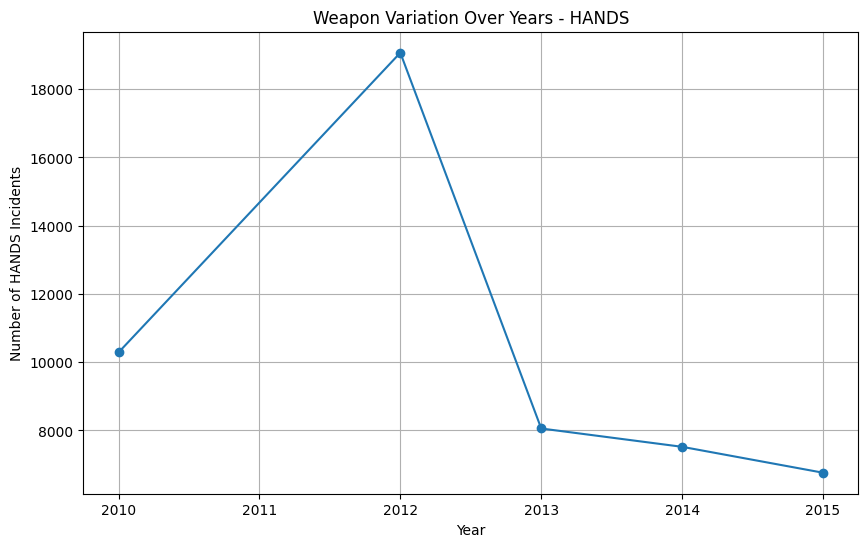

Weapon Variation for FIREARM:
+----+-------------+
|Year|FIREARM_Count|
+----+-------------+
|2010|         3245|
|2012|         6299|
|2013|         3100|
|2014|         4499|
|2015|         4039|
+----+-------------+



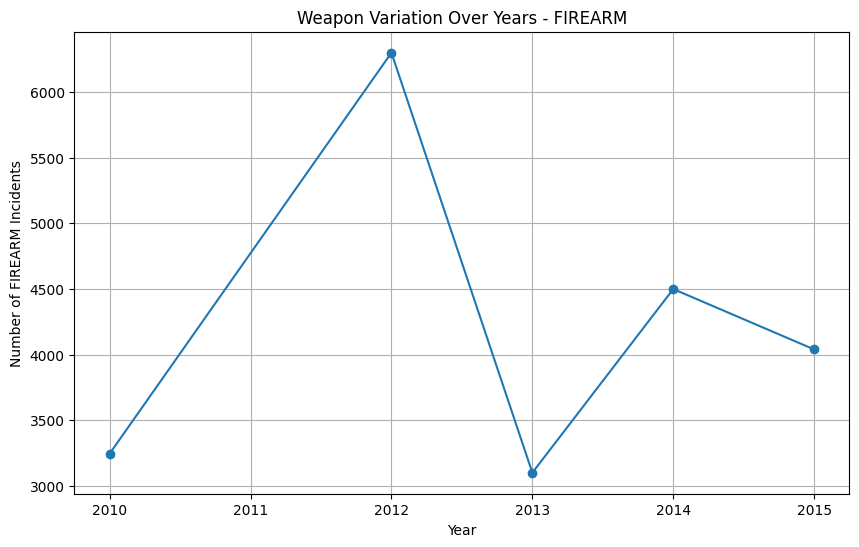

In [62]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, when
import matplotlib.pyplot as plt

# Create a Spark session
spark = SparkSession.builder.appName("WeaponVariationOverYears").getOrCreate()


# Create a function to calculate weapon variation and plot it
def weapon_variation_and_plot(weapon_type):
    # Filter rows where 'Weapon' is the specified type
    df_weapon = df.filter(df.Weapon == weapon_type)

    # Group by 'Year' and count the occurrences of the specified weapon type
    weapon_variation = (
        df_weapon.groupBy('Year')
        .agg(count(when(df_weapon.Weapon == weapon_type, True)).alias(f'{weapon_type}_Count'))
        .orderBy('Year')
    )

    # Show the variation
    print(f"Weapon Variation for {weapon_type}:")
    weapon_variation.show()

    # Collect the data to Python for plotting
    weapon_variation_collect = weapon_variation.collect()

    # Plot the variation
    years = [row['Year'] for row in weapon_variation_collect]
    counts = [row[f'{weapon_type}_Count'] for row in weapon_variation_collect]

    plt.figure(figsize=(10, 6))
    plt.plot(years, counts, marker='o')
    plt.xlabel('Year')
    plt.ylabel(f'Number of {weapon_type} Incidents')
    plt.title(f'Weapon Variation Over Years - {weapon_type}')
    plt.grid(True)
    plt.show()

# Call the function for 'HANDS'
weapon_variation_and_plot('HANDS')

# Call the function for 'FIREARM'
weapon_variation_and_plot('FIREARM')


Weapon Usage by Month for HANDS:
+-----+-----------+
|Month|HANDS_Count|
+-----+-----------+
|    1|       9947|
|   12|      41744|
+-----+-----------+



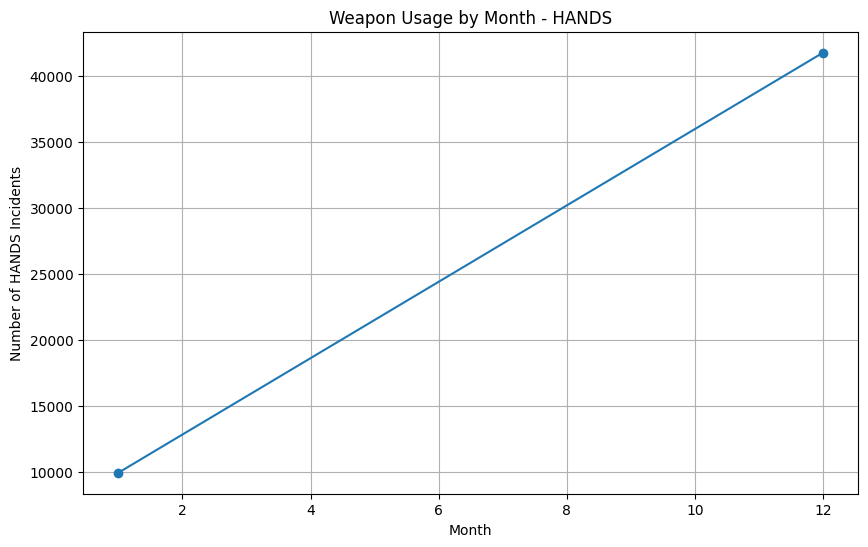

Weapon Usage by Month for FIREARM:
+-----+-------------+
|Month|FIREARM_Count|
+-----+-------------+
|    1|         3125|
|   12|        18057|
+-----+-------------+



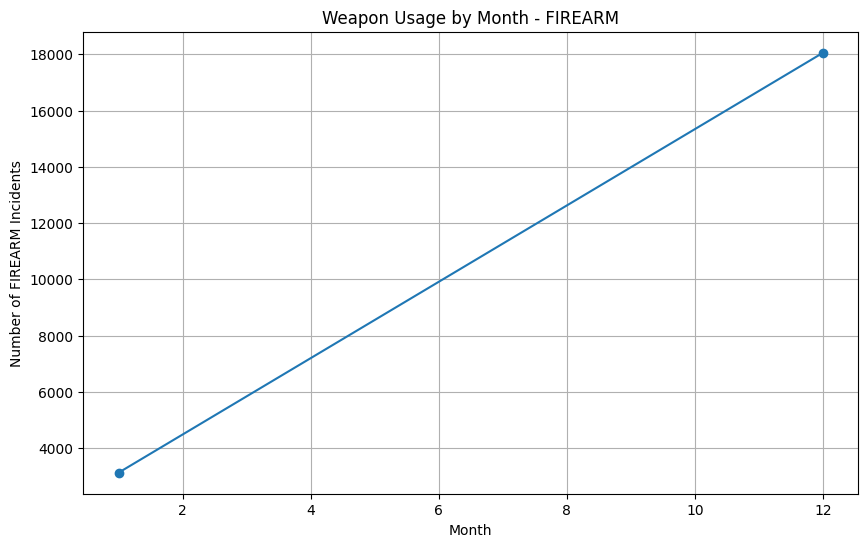

In [63]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, when, month
import matplotlib.pyplot as plt

def weapon_usage_by_month_and_plot(weapon_type):
    df_weapon = df.filter(df.Weapon == weapon_type)

    df_weapon = df_weapon.withColumn('Month', month(df_weapon['date']))

    weapon_usage_by_month = (
        df_weapon.groupBy('Month')
        .agg(count(when(df_weapon.Weapon == weapon_type, True)).alias(f'{weapon_type}_Count'))
        .orderBy('Month')
    )

    print(f"Weapon Usage by Month for {weapon_type}:")
    weapon_usage_by_month.show()

    weapon_usage_by_month_collect = weapon_usage_by_month.collect()

    months = [row['Month'] for row in weapon_usage_by_month_collect]
    counts = [row[f'{weapon_type}_Count'] for row in weapon_usage_by_month_collect]

    plt.figure(figsize=(10, 6))
    plt.plot(months, counts, marker='o')
    plt.xlabel('Month')
    plt.ylabel(f'Number of {weapon_type} Incidents')
    plt.title(f'Weapon Usage by Month - {weapon_type}')
    plt.grid(True)
    plt.show()

weapon_usage_by_month_and_plot('HANDS')

weapon_usage_by_month_and_plot('FIREARM')


+----+---------------+
|year|Total_Incidents|
+----+---------------+
|2010|          50651|
|2012|          99103|
|2013|          45958|
|2014|          48806|
|2015|          41289|
+----+---------------+



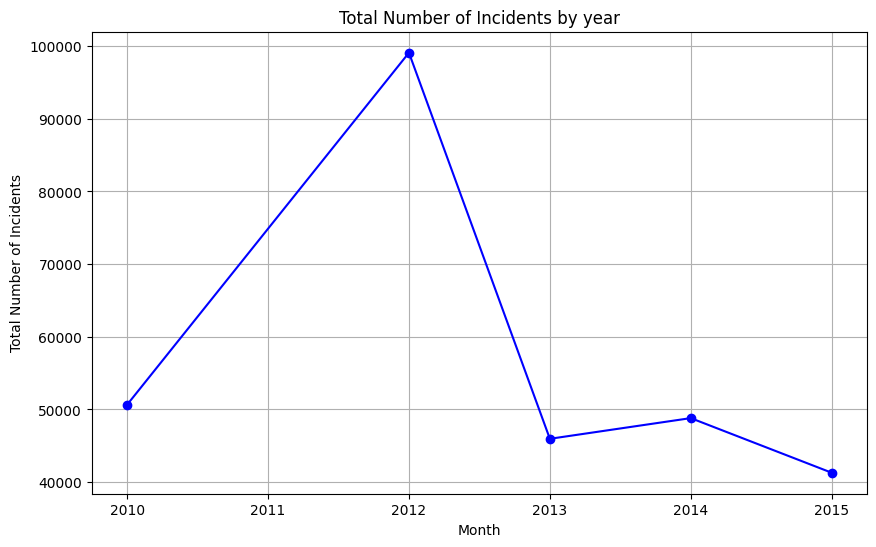

In [65]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, month
import matplotlib.pyplot as plt


# Extract year from 'date' column
df = df.withColumn('year', year(df['date']))

# Group by 'Month' and count the total number of incidents
total_incidents_by_year = (
    df.groupBy('year')
    .agg(count('*').alias('Total_Incidents'))
    .orderBy('year')
)

total_incidents_by_year.show()

total_incidents_by_year_collect = total_incidents_by_year.collect()

months = [row['year'] for row in total_incidents_by_year_collect]
total_incidents = [row['Total_Incidents'] for row in total_incidents_by_year_collect]

plt.figure(figsize=(10, 6))
plt.plot(months, total_incidents, marker='o', color='b')
plt.xlabel('Month')
plt.ylabel('Total Number of Incidents')
plt.title('Total Number of Incidents by year')
plt.grid(True)
plt.show()


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, month
import matplotlib.pyplot as plt


# Extract year from 'date' column
df = df.withColumn('month', year(df['month']))

# Group by 'Month' and count the total number of incidents
total_incidents_by_year = (
    df.groupBy('year')
    .agg(count('*').alias('Total_Incidents'))
    .orderBy('year')
)

total_incidents_by_year.show()

total_incidents_by_year_collect = total_incidents_by_year.collect()

months = [row['year'] for row in total_incidents_by_year_collect]
total_incidents = [row['Total_Incidents'] for row in total_incidents_by_year_collect]

plt.figure(figsize=(10, 6))
plt.plot(months, total_incidents, marker='o', color='b')
plt.xlabel('Month')
plt.ylabel('Total Number of Incidents')
plt.title('Total Number of Incidents by year')
plt.grid(True)
plt.show()


+--------------------+-----------+
|Description         |Crime_Count|
+--------------------+-----------+
|LARCENY             |51859      |
|COMMON ASSAULT      |38620      |
|BURGLARY            |37103      |
|LARCENY FROM AUTO   |31989      |
|AUTO THEFT          |23147      |
|AGG. ASSAULT        |23069      |
|ROBBERY - STREET    |14337      |
|ROBBERY - COMMERCIAL|3369       |
|ASSAULT BY THREAT   |2893       |
|ROBBERY - RESIDENCE |2451       |
+--------------------+-----------+
only showing top 10 rows



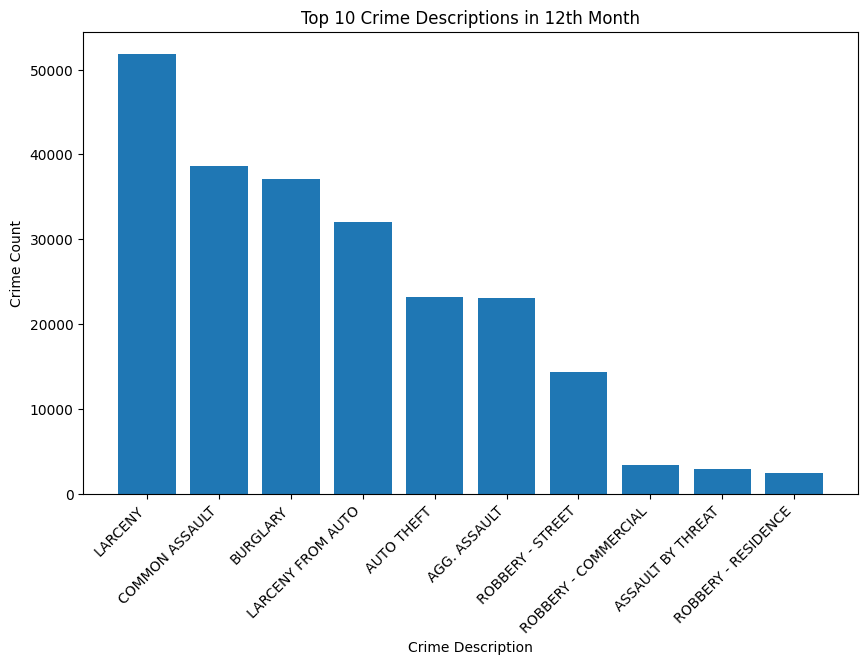

In [68]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, month, desc
import matplotlib.pyplot as plt

df = df.withColumn('Month', month(df['date']))

# Filter for the 12th month
df_12th_month = df.filter(df['Month'] == 12)

# Group by 'Description', count the occurrences, and rank them
top_descriptions_12th_month = (
    df_12th_month.groupBy('Description')
    .agg(count('*').alias('Crime_Count'))
    .orderBy(desc('Crime_Count'))
)

# Show the top 10 crime descriptions for the 12th month
top_descriptions_12th_month.show(10, truncate=False)

# Collect the data to Python for plotting
top_descriptions_12th_month_collect = top_descriptions_12th_month.collect()


In [71]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, desc

top_locations = (
    df.groupBy('Location')
    .agg(count('*').alias('Crime_Count'))
    .orderBy(desc('Crime_Count'))
    .limit(3)
)

top_locations.show(truncate=False)

for location_row in top_locations.collect():
    location = location_row['Location']

    top_descriptions_location = (
        df.filter(df['Location'] == location)
        .groupBy('Description')
        .agg(count('*').alias('Crime_Count'))
        .orderBy(desc('Crime_Count'))
        .limit(3)
    )

    print(f"\nTop 3 Crime Descriptions in Location '{location}':")
    top_descriptions_location.show(truncate=False)


+--------------+-----------+
|Location      |Crime_Count|
+--------------+-----------+
|              |1623       |
|200 E PRATT ST|676        |
|300 LIGHT ST  |603        |
+--------------+-----------+


Top 3 Crime Descriptions in Location '':
+-----------------+-----------+
|Description      |Crime_Count|
+-----------------+-----------+
|LARCENY FROM AUTO|373        |
|LARCENY          |350        |
|COMMON ASSAULT   |290        |
+-----------------+-----------+


Top 3 Crime Descriptions in Location '200 E PRATT ST':
+-----------------+-----------+
|Description      |Crime_Count|
+-----------------+-----------+
|LARCENY          |474        |
|COMMON ASSAULT   |85         |
|LARCENY FROM AUTO|37         |
+-----------------+-----------+


Top 3 Crime Descriptions in Location '300 LIGHT ST':
+-----------------+-----------+
|Description      |Crime_Count|
+-----------------+-----------+
|LARCENY          |468        |
|COMMON ASSAULT   |65         |
|LARCENY FROM AUTO|24         |
+-

In [72]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import hour, count

df = df.withColumn('Hour', hour(df['CrimeTime']))

crime_count_by_hour = (
    df.groupBy('Hour')
    .agg(count('*').alias('Crime_Count'))
    .orderBy('Crime_Count', ascending=False)
)

most_crime_hour = crime_count_by_hour.first()['Hour']
print(f"The hour with the most crime count is: {most_crime_hour}")

crime_count_by_hour.show(truncate=False)


The hour with the most crime count is: 18
+----+-----------+
|Hour|Crime_Count|
+----+-----------+
|18  |17057      |
|17  |16476      |
|0   |16429      |
|15  |16127      |
|16  |15951      |
|20  |15513      |
|21  |15467      |
|19  |15317      |
|22  |14789      |
|12  |14324      |
|23  |13685      |
|14  |13327      |
|13  |12275      |
|1   |11765      |
|11  |11299      |
|10  |10928      |
|8   |10303      |
|9   |10205      |
|2   |8372       |
|7   |7592       |
+----+-----------+
only showing top 20 rows

